# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
merged_df = pd.read_csv('base_tratada.csv')

merged_df.head()

,Unnamed: 0,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,TARGET,CODE_GENDER_M
0,0,5008804,0,427500.0,-4542,1,1,0,0,1,1
1,1,5008805,0,427500.0,-4542,1,1,0,0,1,1
2,2,5008806,0,112500.0,-1134,1,0,0,0,1,1
3,3,5008808,0,270000.0,-3051,1,0,1,1,0,0
4,5,5008810,0,270000.0,-3051,1,0,1,1,1,0


In [4]:
y = merged_df.TARGET

X = merged_df.drop('TARGET',axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24672 entries, 0 to 24671
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        24672 non-null  int64  
 1   ID                24672 non-null  int64  
 2   CNT_CHILDREN      24672 non-null  int64  
 3   AMT_INCOME_TOTAL  24672 non-null  float64
 4   DAYS_EMPLOYED     24672 non-null  int64  
 5   FLAG_MOBIL        24672 non-null  int64  
 6   FLAG_WORK_PHONE   24672 non-null  int64  
 7   FLAG_PHONE        24672 non-null  int64  
 8   FLAG_EMAIL        24672 non-null  int64  
 9   CODE_GENDER_M     24672 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 1.9 MB


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

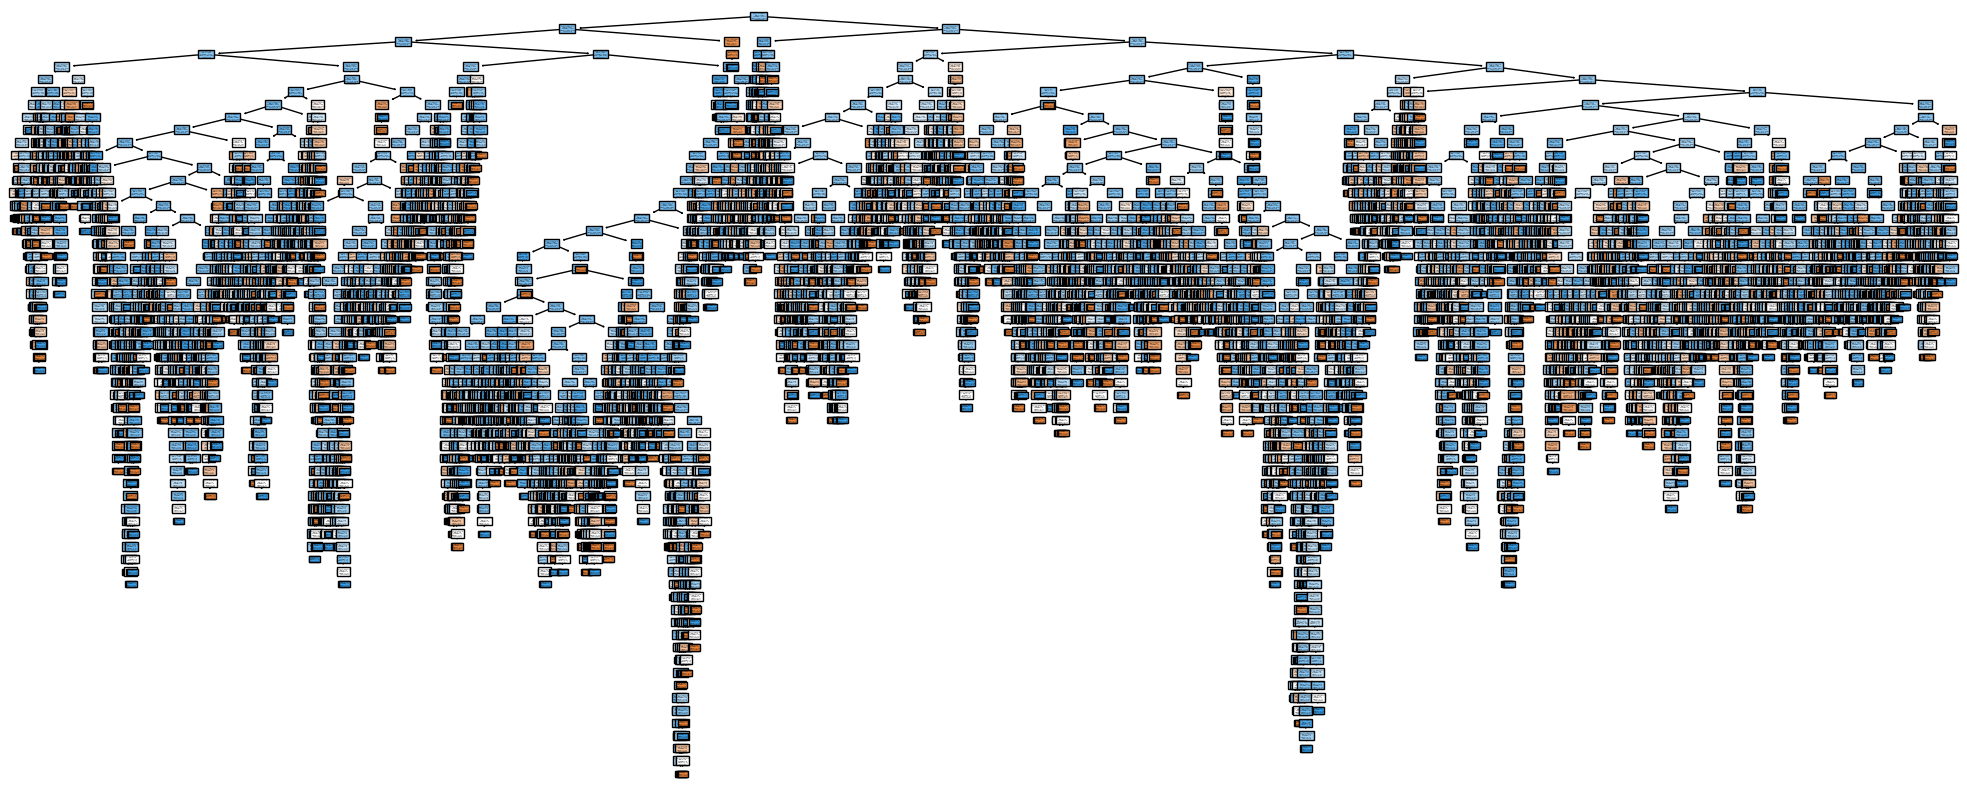

In [7]:
#2.1 - Objeto para a função da árvore
clf = DecisionTreeClassifier(random_state=100)

#2.2 - Treinando o modelo
clf = clf.fit(X_train,y_train)

#2.3 - Visualizando a árvore
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          #max_depth=3,
          #class_names=None,
          class_names=['Mau', 'Bom'],
          feature_names=None);

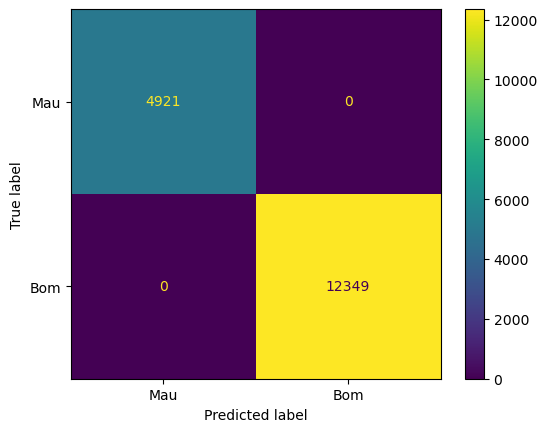

In [23]:
#2.4 - Matriz confusão base de treino
predictions = clf.predict(X_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Reprovados', 'Aprovados'])

disp.plot()

In [24]:
#2.5 - Acurácia

accuracy_score(y_train, predictions)

1.0

#### Acurácia de 100%, o que mostra claramente um exemplo de modelo overfiting. Modelo que só consegue classificar a base que foi dada descendo até o nível que desceu

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

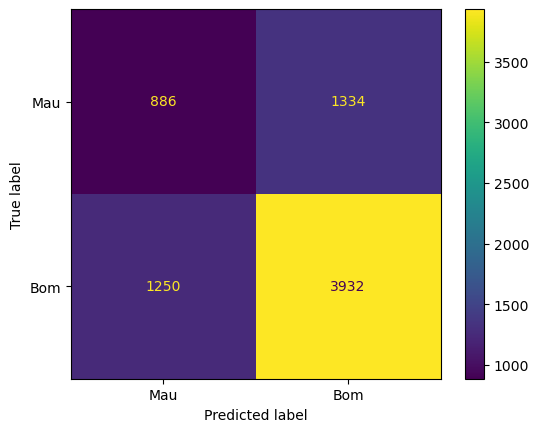

In [25]:
#3.1 Classificando a base de teste
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Mau', 'Bom'])

#3.2 Visualizando
disp.plot()

In [27]:
#3.3 Calculando a acuracia - Teste

accuracy_score(y_test, predictions)

0.6509051607673602

##### Acurácia de treinamento deu 100%

In [29]:
X_train.head()

,Unnamed: 0,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CODE_GENDER_M
18800,40237,5115474,0,112500.0,365243,1,0,0,0,0
14714,31167,5091508,0,157500.0,365243,1,0,1,0,1
7725,17378,5050738,0,427500.0,-682,1,0,0,0,0
3201,5335,5024852,3,81000.0,-884,1,0,0,0,0
16169,33454,5096827,0,315000.0,-2380,1,1,1,0,0


In [33]:
#3.4 - Fazendo nova árvore com novos parâmetros
clf_v2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

clf_v2 = clf_v2.fit(X_train,y_train)

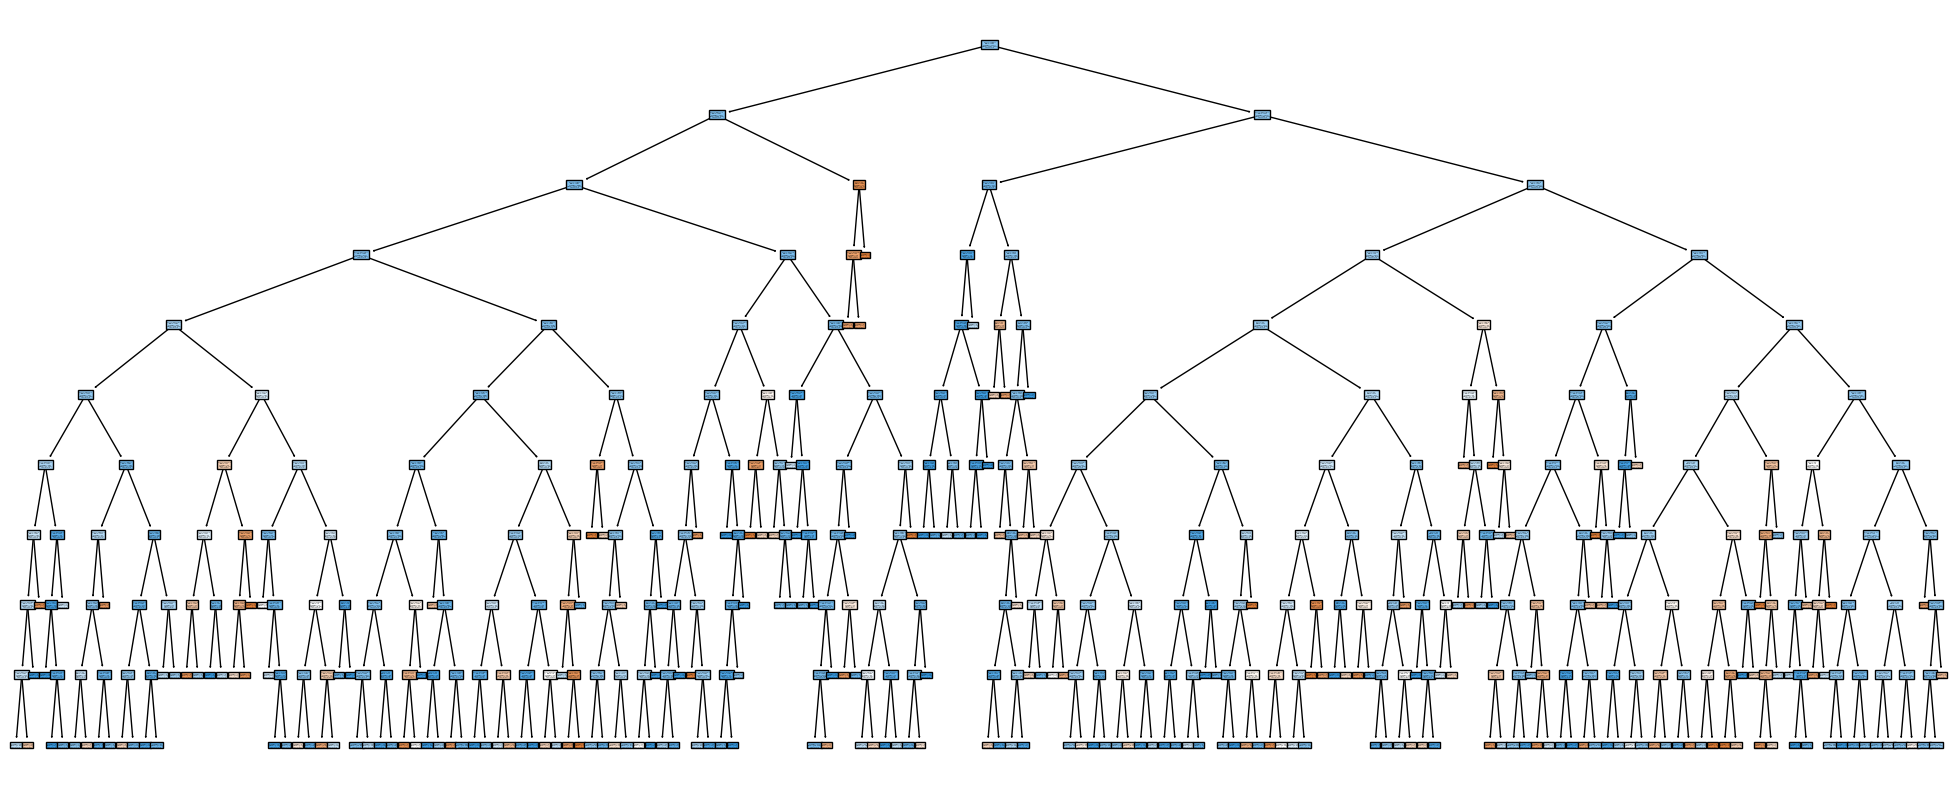

In [34]:
plt.figure(figsize=(25, 10))
plot_tree(clf_v2,
          filled=True,
          #max_depth=3,
          #class_names=None,
          class_names=['Mau', 'Bom'],
          feature_names=None);

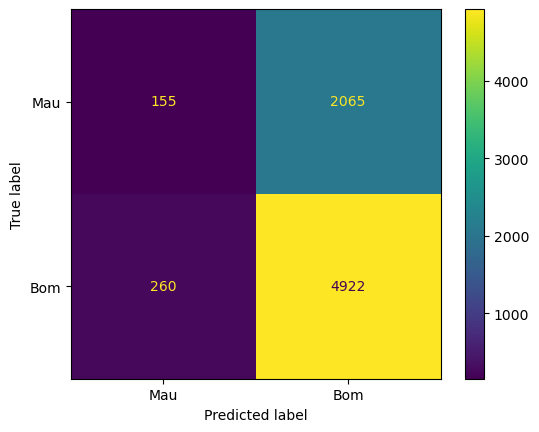

In [38]:
predictions_v2 = clf_v2.predict(X_test)
cm_v2 = confusion_matrix(y_test, predictions_v2, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_v2, display_labels=['Mau', 'Bom'])

disp.plot()

In [40]:
accuracy_score(y_test, predictions_v2)

0.6858957038638206

3.5 - Caso todos fossem classificados como bom no modelo, o acerto seria de 70%, acima da acurácia no modelo de teste